<a href="https://colab.research.google.com/github/Lord-Kanzler/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/LS_DS_Unit_4_Sprint_Challenge_3_v2_ALEX_KAISER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [45]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# imports
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [60]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!
batch_size = 64
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Build model...')

# model
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128,activation='tanh', recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dense(60,activation='softmax'))
model.summary()

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 60)                7740      
Total params: 4,104,764
Trainable params: 4,104,764
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [70]:
# model fit
results = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('val_loss:', score)
print('val_accuracy:', acc)

Epoch 1/20
141/141 [==============================] - 8s 59ms/step - loss: 0.0884 - accuracy: 0.9565 - val_loss: 1.8167 - val_accuracy: 0.7017
Epoch 2/20
141/141 [==============================] - 8s 55ms/step - loss: 0.0846 - accuracy: 0.9547 - val_loss: 1.9366 - val_accuracy: 0.6892
Epoch 3/20
141/141 [==============================] - 8s 54ms/step - loss: 0.0830 - accuracy: 0.9565 - val_loss: 1.8638 - val_accuracy: 0.7004
Epoch 4/20
141/141 [==============================] - 8s 54ms/step - loss: 0.0806 - accuracy: 0.9571 - val_loss: 1.8626 - val_accuracy: 0.7061
Epoch 5/20
141/141 [==============================] - 8s 53ms/step - loss: 0.0761 - accuracy: 0.9585 - val_loss: 1.8942 - val_accuracy: 0.6981
Epoch 6/20
141/141 [==============================] - 8s 53ms/step - loss: 0.0758 - accuracy: 0.9577 - val_loss: 1.9082 - val_accuracy: 0.6990
Epoch 7/20
141/141 [==============================] - 8s 54ms/step - loss: 0.0946 - accuracy: 0.9537 - val_loss: 1.8608 - val_accuracy: 0.7057

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

**We didn't really cover pad_sequences in lecture, but padding is used to ensure that all data is the same length. it is used to avoid batching sequences of varying lengths.**



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

**LSTMs help with the vanishing gradient problem, and because LSTMs have memory cells, they are able to remeber information for longer time steps.**


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

**Speech-to-text-translation, text-translation, audio-classification. They're good for these problems because they're all time series problems and LSTMs are the best fit for dealing with sequential and time series data.**

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [0]:
from skimage.io import imread_collection

images = imread_collection('./frog_images/*.jpg')

In [2]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [3]:
images[1]

array([[[246, 244, 247],
        [246, 244, 247],
        [246, 244, 247],
        ...,
        [ 17,  48,  40],
        [ 19,  50,  42],
        [ 17,  48,  40]],

       [[246, 244, 247],
        [246, 244, 247],
        [246, 244, 247],
        ...,
        [ 17,  48,  40],
        [ 20,  51,  43],
        [ 19,  50,  42]],

       [[246, 244, 247],
        [246, 244, 247],
        [246, 244, 247],
        ...,
        [ 18,  49,  41],
        [ 21,  52,  44],
        [ 21,  52,  44]],

       ...,

       [[ 17,  35,  21],
        [ 18,  36,  22],
        [ 18,  36,  22],
        ...,
        [142, 136, 104],
        [142, 136, 104],
        [142, 136, 104]],

       [[ 15,  33,  21],
        [ 16,  32,  21],
        [ 16,  32,  21],
        ...,
        [145, 136, 107],
        [143, 134, 105],
        [141, 132, 101]],

       [[ 14,  32,  20],
        [ 15,  31,  20],
        [ 15,  31,  20],
        ...,
        [145, 136, 107],
        [143, 134, 105],
        [141, 132, 101]]

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
# TODO - your code!

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50V2(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)

  for entry in results:
    if entry[1] in ['bullfrog', 'tree frog', 'tailed frog']:
      return "FROG!"
    
    if entry[1] == 'fish':
      return "There's a FISH!"
  return "NOT FROG!"

In [6]:
for i in images:
    x = img_contains_frog(i)
    print(f"What does image {i+1} contain? {x}")
    print()


[('n01496331', 'electric_ray', 0.025190879), ('n01498041', 'stingray', 0.0191827), ('n01494475', 'hammerhead', 0.0113684535)]
What does image [[[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 ...

 [[16 17 12]
  [15 16 11]
  [15 16 11]
  ...
  [30 30 18]
  [29 29 17]
  [29 29 17]]

 [[15 16 11]
  [15 16 11]
  [15 16 11]
  ...
  [30 30 18]
  [29 29 17]
  [29 29 17]]

 [[14 15 10]
  [14 15 10]
  [13 14  9]
  ...
  [31 31 19]
  [31 31 19]
  [30 30 18]]] contain? NOT FROG!

[('n03888257', 'parachute', 0.048311066), ('n09472597', 'volcano', 0.034585137), ('n01608432', 'kite', 0.034245294)]
What does image [[[247 245 248]
  [247 245 248]
  [247 245 248]
  ...
  [ 18  49  41]
  [ 20  51  43]
  [ 18  49  41]]

 [[247 245 248]
  [247 245 248]
  [247 245 248]
  ...
  [ 18  49  41]
  [ 21  5

In [0]:
# testing 
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

path = './frog_images/'

# your images in an array
imgs = loadImages(path)


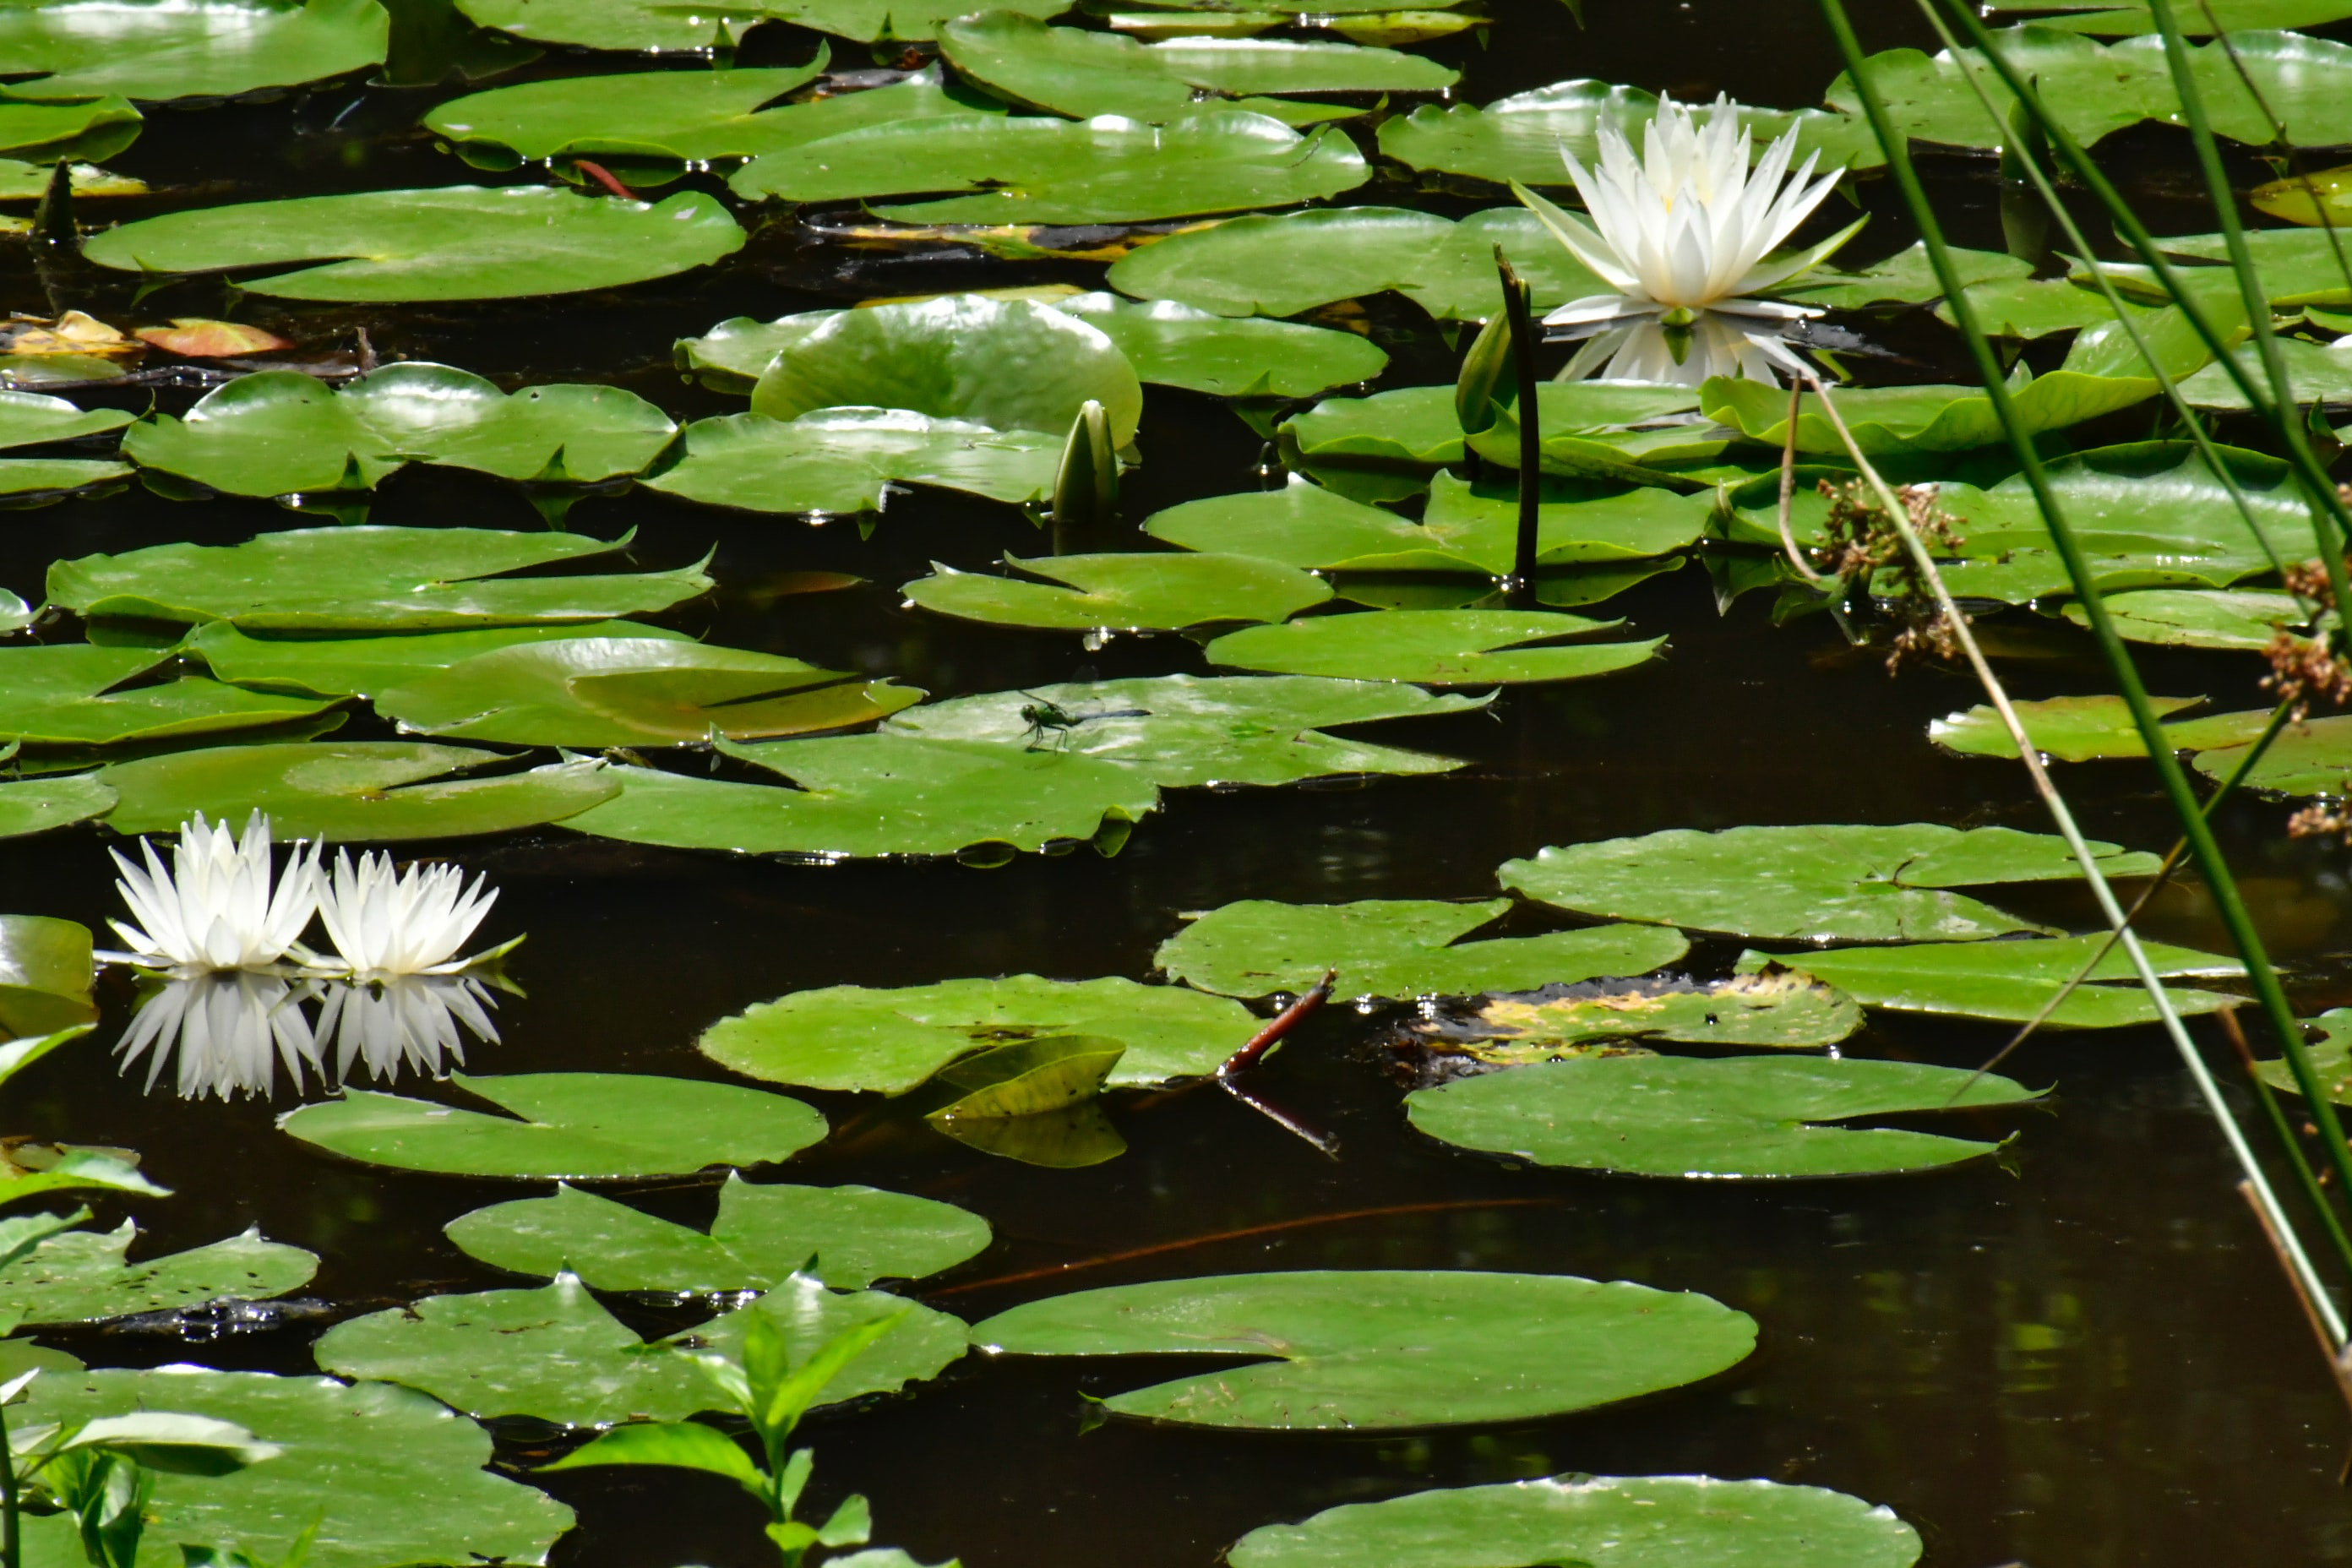

In [117]:
imgs[0]

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

**I'd like to think that I'm good at using data for storytelling. But knowing myself, I'm probably the strongest at digging into a given topic and breaking it down to fully understand what's going on exactly. I like to learn, and usually accomplish this by taking everything apart, trying to understand how it works, and putting it back together. While somewhat obsessive, this trait is well suited for DS.**

- What area of Data Science would you most like to learn more about, and why?

**Dimensionality reduction techniques and LSTMs for multiple classification. Autotuning and autoencoding are also very interetsing. I would like to use multiple techniques in a loop fashion for personal projects, like automated stock trading etc. Other than that, I'm very interested in applying everything I've learned in one way or another. As for the why question, because I'd like to see what's possible, and why the heck not? If you are given toys to play with, why not use them?**

- Where do you think Data Science will be in 5 years?

**To be honest, I have absolutely no idea. The field is constantly changing that even one year from now will be very different from where were at today. Also having done DS for less than half a year so far, I'd say I had to little input and experience to make such predictions.**

- What are the threats posed by AI to our society?

**Misallignments between intended purpases of AIs and and the way they are deployed. There are numerous safetly concerns, and unfortunatly people in power tend to have different motives than researchers and developers.**

- How do you think we can counteract those threats?

**Be good parents to our creations. There's certainly a path to use AIs and AGIs in a purely constructive mannor, but people with power are blind sided idiots. To really counteract potential treats, we should start electing our leaders based on merit and intelligence, instead of flashiness.**

- Do you think achieving General Artifical Intelligence is ever possible?

**100 hundred years ago, nobody though that powered flight is possible, or that it's possible to go faster than the speed of sound. As such I can only say, why-the-heck-not?? It might not happen tomorrow, and it might not happen with our corrent approach or level of technology, but if you can envision it, it can be done.**


A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [30]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")